In [11]:
import os 

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.fft import fft, ifft
from scipy.signal import decimate, windows
import pickle

In [9]:
root_dir = '/home/sss/#data/psc_beams'
raw_data_folder = os.path.join(root_dir, 'raw/2022.05.23_PSC Beam 4ch acc measurement ambient')
preprocessed_folder = os.path.join(root_dir, 'preprocessed/2022.05.23_PSC Beam 4ch acc measurement ambient')

folder_list = [
    dict(
        file_name = '2022.05.23_PSC_Beam_4ch_acc_10t_ambient_22-05-23_1549.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'train', 
        data_count_from = 0000
    ),
    dict(
        file_name = '2022.05.23_PSC_Beam_4ch_acc_9t_ambient_22-05-23_1530.lvm',
        is_anomaly = True,
        anomaly_type = 'Tendon Loss',
        train_type = 'train', 
        data_count_from = 1000
    ),
    # dict(
    #     file_name = '2022.05.23_PSC_Beam_4ch_9.979t_impact_load_22-05-23_1155.lvm',
    #     is_anomaly = False,
    #     anomaly_type = None,
    #     train_type = 'test', 
    #     data_count_from = 2000
    # ),
    # dict(
    #     file_name = '2022.05.23_PSC_Beam_4ch_9.066t_impact_load_22-05-23_1245.lvm',
    #     is_anomaly = True,
    #     anomaly_type = 'Tendon Loss',
    #     train_type = 'test', 
    #     data_count_from = 3000
    # ),
]

duration = 20
raw_freq = 2048
process_freq = 128

In [10]:
channels = ['ch_0', 'ch_1', 'ch_2', 'ch_3']

for item in folder_list : 
    print(item)
    
    lvm_path = os.path.join(raw_data_folder, item['file_name'])
    save_path = os.path.join(preprocessed_folder, item['train_type'])
    lvm = pd.read_csv(lvm_path, sep = '\t', names = ['time'] + channels)

    n_sample_per_data = raw_freq * duration
    
    n_data = np.int(np.floor(lvm.shape[0] / n_sample_per_data)) # truncate ramaining part

    lvm_list = [lvm[n*n_sample_per_data:(n+1)*n_sample_per_data] for n in range(n_data)]

    for idx, lvm_data in enumerate(lvm_list) :
        
        data = {}
        data['sample_rate'] = process_freq
        data['is_anomal'] = item['is_anomaly']
        data['anomaly_type'] = item['anomaly_type']
        # data['time'] = lvm_data['time']
        for ch in channels: 
            resized = decimate(lvm_data[ch].values, int(raw_freq / process_freq), ftype='fir')
            data[ch] = resized

        data_save_path = os.path.join(save_path, 'data_{}.pkl'.format(str(idx+item['data_count_from']+1).zfill(4)))

        with open(data_save_path, 'wb') as f :
            pickle.dump(data, f)


{'file_name': '2022.05.23_PSC_Beam_4ch_acc_10t_ambient_22-05-23_1549.lvm', 'is_anomaly': False, 'anomaly_type': None, 'train_type': 'train', 'data_count_from': 0}


/home/sss/anaconda3/envs/brg-ad/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == "":


{'file_name': '2022.05.23_PSC_Beam_4ch_acc_10t_ambient_22-05-23_1549.lvm', 'is_anomaly': False, 'anomaly_type': None, 'train_type': 'train', 'data_count_from': 100}
{'file_name': '2022.05.23_PSC_Beam_4ch_acc_10t_ambient_22-05-23_1549.lvm', 'is_anomaly': False, 'anomaly_type': None, 'train_type': 'train', 'data_count_from': 200}
{'file_name': '2022.05.23_PSC_Beam_4ch_acc_9t_ambient_22-05-23_1530.lvm', 'is_anomaly': True, 'anomaly_type': 'Tendon Loss', 'train_type': 'train', 'data_count_from': 1000}


Text(0.5, 0, 'Frequency (Hz)')

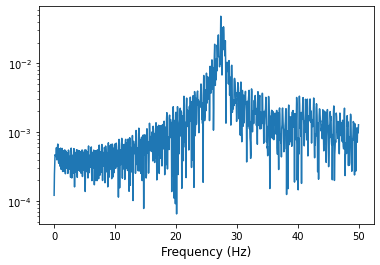

In [16]:
# plt.plot(resized)


freq = 128


n_sample =  freq*20 
data_plot = resized
window = windows.hamming(n_sample)
fft_result = fft(data_plot*window)

xf = np.linspace(0.0, 1.0/(2.0)*freq, n_sample//2)
fft_abs = np.abs(fft_result[:int(len(fft_result)/2)])
fft_plot = 2.0/n_sample * fft_abs


plot_start = 0000
plot_idx = plot_start + 1000
plt.semilogy(xf[plot_start:plot_idx], fft_plot[plot_start:plot_idx])
plt.xlabel("Frequency (Hz)", fontsize=12)

In [ ]:
folder_list = [
    dict(
        file_name = 'normal_alm_sb_acc_22-05-09_1816-1922.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'train', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'sectionLoss_alm_sb_acc_22-05-09_1930.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'train', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'normal_alm_sb_acc_22-05-09_2048.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'test', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'sectionLoss_alm_sb_acc_22-05-09_2132-2142.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'sectionLoss_alm_sb_acc_22-05-09_2151.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1500
    ), 
]

In [41]:
root_dir = '/home/sss/#data/shear_building'
raw_data_folder = os.path.join(root_dir, 'raw_data/2022.05.03 two stroy shear aluminum building')
preprocessed_folder = os.path.join(root_dir, 'preprocessed_data/2022.05.03_two_story_aluminum_building/')


folder_list = [
    dict(
        file_name = 'normal_acc_22-05-03_1605.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'train', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'anormal_13.55mm_acc_22-05-03_1704.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'train', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'normal_acc_22-05-03_1755.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'test', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'normal_acc_22-05-03_1757.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'test', 
        data_count_from = 500
    ),
    dict(
        file_name = 'anormaly_1@13.55mm_acc_22-05-03_1830.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'anormaly_1@13.55mm_acc_22-05-03_1842.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1500
    ), 
]


duration = 25 
raw_freq = 20000
process_freq = 100

In [ ]:
root_dir = '/home/sss/#data/shear_building'
raw_data_folder = os.path.join(root_dir, 'raw_data/2022.05.09 anomaly detection shear aluminum building (section loss, buckling)')
preprocessed_folder = os.path.join(root_dir, 'preprocessed_data/2022.05.09_two_alu_building/')

folder_list = [
    dict(
        file_name = 'normal_alm_sb_acc_22-05-09_1816-1922.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'train', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'sectionLoss_alm_sb_acc_22-05-09_1930.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'train', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'normal_alm_sb_acc_22-05-09_2048.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'test', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'sectionLoss_alm_sb_acc_22-05-09_2132-2142.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'sectionLoss_alm_sb_acc_22-05-09_2151.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1500
    ), 
]

duration = 20
raw_freq = 2048
process_freq = 128

In [ ]:
root_dir = '/home/sss/#data/shear_building'
raw_data_folder = os.path.join(root_dir, 'raw_data/2022.05.10 shear two stroy building aluminum (normal, sectionLoss, buckling)')
preprocessed_folder = os.path.join(root_dir, 'preprocessed_data/2022.05.10_two_alu_building_section_loss_buckling/')

folder_list = [
    dict(
        file_name = 'normal_acc_22-05-10_1101.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'train', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'sectionLoss_acc_22-05-10_1221.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'train', 
        data_count_from = 1000
    ),
    dict(
        file_name = 'normal_acc_test_22-05-10_1339.lvm',
        is_anomaly = False,
        anomaly_type = None,
        train_type = 'test', 
        data_count_from = 0000
    ),
    dict(
        file_name = 'sectionLoss_acc_test_22-05-10_1423.lvm',
        is_anomaly = True,
        anomaly_type = 'Section Loss',
        train_type = 'test', 
        data_count_from = 1000
    ),
]

duration = 20
raw_freq = 2048
process_freq = 128